# Clustering Assignment

## Theoretical Questions

### 1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the model is not provided with labeled training data. Instead, it tries to find patterns and relationships in the data on its own. Clustering is a popular unsupervised learning technique.

### 2. How does K-Means clustering algorithm work?
K-Means partitions the data into K clusters by:
- Initializing K centroids randomly
- Assigning each data point to the nearest centroid
- Updating centroids as the mean of assigned points
- Repeating the assign-update steps until convergence

### 3. Explain the concept of a dendrogram in hierarchical clustering
A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It helps visualize the hierarchy of clusters.

### 4. What is the main difference between K-Means and Hierarchical Clustering?
- K-Means requires the number of clusters to be defined beforehand, while Hierarchical clustering does not.
- K-Means uses centroids and is iterative; Hierarchical builds a hierarchy from bottom-up or top-down.

### 5. What are the advantages of DBSCAN over K-Means?
- Handles clusters of arbitrary shapes
- Does not require number of clusters
- Can identify noise/outliers

### 6. When would you use Silhouette Score in clustering?
Silhouette Score evaluates the quality of clustering by measuring how similar an object is to its own cluster vs other clusters. Higher values indicate better-defined clusters.

### 7. What are the limitations of Hierarchical Clustering?
- Computationally expensive for large datasets
- Sensitive to noise and outliers
- Once a merge or split is done, it cannot be undone

### 8. Why is feature scaling important in clustering algorithms like K-Means?
K-Means relies on distance metrics; features with larger ranges can dominate the clustering. Feature scaling ensures fair contribution.

### 9. How does DBSCAN identify noise points?
Points that do not have enough neighboring points within a specified radius (`eps`) are labeled as noise.

### 10. Define inertia in the context of K-Means
Inertia is the sum of squared distances between each point and its assigned cluster centroid. Lower values indicate better clustering.

### 11. What is the elbow method in K-Means clustering?
The elbow method plots inertia vs number of clusters. The 'elbow' point (where inertia reduction slows down) indicates the optimal cluster count.

### 12. Describe the concept of "density" in DBSCAN
Density refers to the number of points within a radius (`eps`) around a data point. DBSCAN uses density to form clusters.

### 13. Can hierarchical clustering be used on categorical data?
Yes, but it requires appropriate distance measures (like Hamming distance) and encodings (e.g., one-hot encoding).

### 14. What does a negative Silhouette Score indicate?
A negative score means that the data point may have been assigned to the wrong cluster.

### 15. Explain the term "linkage criteria" in hierarchical clustering
Linkage criteria determine how distances between clusters are calculated:
- Single: min distance
- Complete: max distance
- Average: mean distance

### 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
K-Means assumes clusters of similar size and density. It may merge small dense clusters or split large sparse ones incorrectly.

### 17. What are the core parameters in DBSCAN, and how do they influence clustering?
- `eps`: radius to search neighbors
- `min_samples`: minimum neighbors to form a core point
Larger `eps`/smaller `min_samples` = larger, looser clusters

### 18. How does K-Means++ improve upon standard K-Means initialization?
K-Means++ selects initial centroids more strategically by spreading them out, improving convergence and final clustering.

### 19. What is agglomerative clustering?
It’s a bottom-up hierarchical clustering where each observation starts as its own cluster and pairs of clusters are merged based on linkage criteria.

### 20. What makes Silhouette Score a better metric than just inertia for model evaluation?
Inertia only measures compactness. Silhouette Score considers both intra-cluster compactness and inter-cluster separation.


In [1]:
## ==== Practical Questions ===================================

In [2]:
## Practical Questions

### 21. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.678738720085253


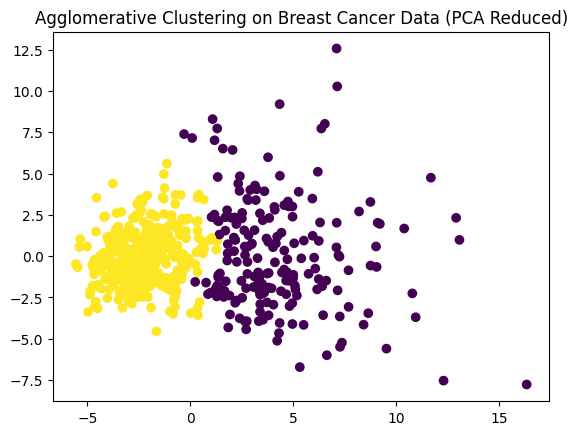

In [3]:
### 22. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

cancer = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(cancer.data)
X_pca = PCA(n_components=2).fit_transform(X_scaled)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on Breast Cancer Data (PCA Reduced)")
plt.show()

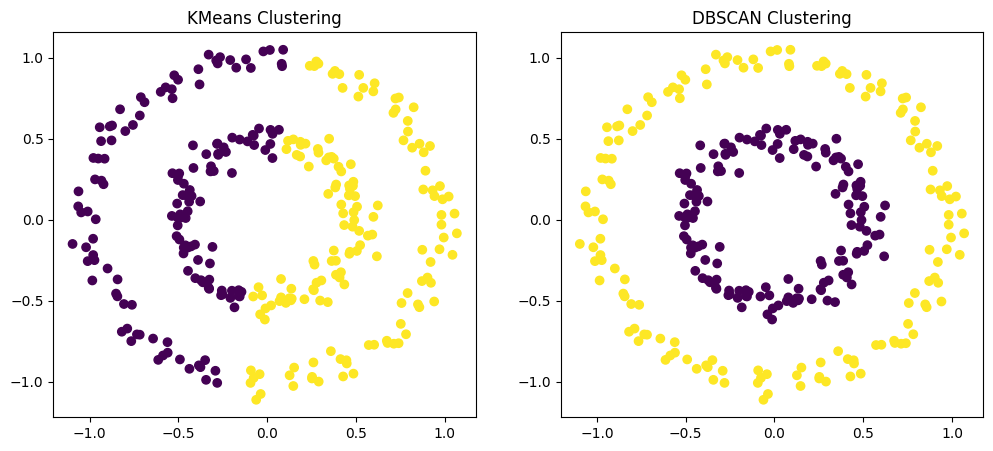

In [4]:
### 23. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side


from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans, cmap='viridis')
axs[0].set_title("KMeans Clustering")
axs[1].scatter(X[:, 0], X[:, 1], c=dbscan, cmap='viridis')
axs[1].set_title("DBSCAN Clustering")
plt.show()

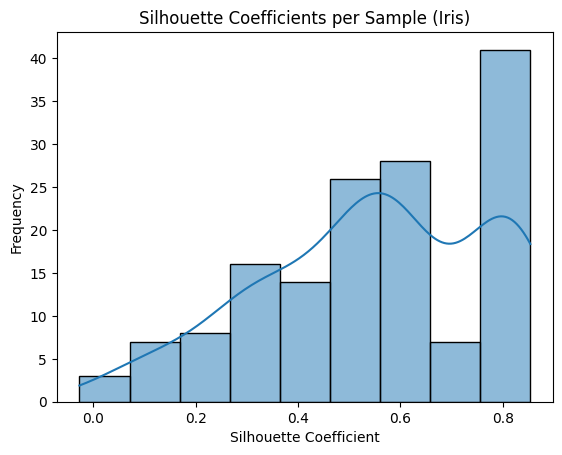

In [6]:
### 24. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples
import seaborn as sns

iris = load_iris()
X = iris.data
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sil_samples = silhouette_samples(X, labels)

sns.histplot(sil_samples, kde=True)
plt.title("Silhouette Coefficients per Sample (Iris)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Frequency")
plt.show()


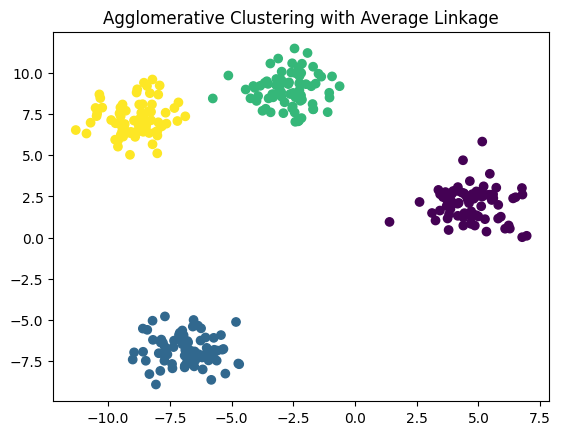

In [7]:
### 25. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering with Average Linkage")
plt.show()

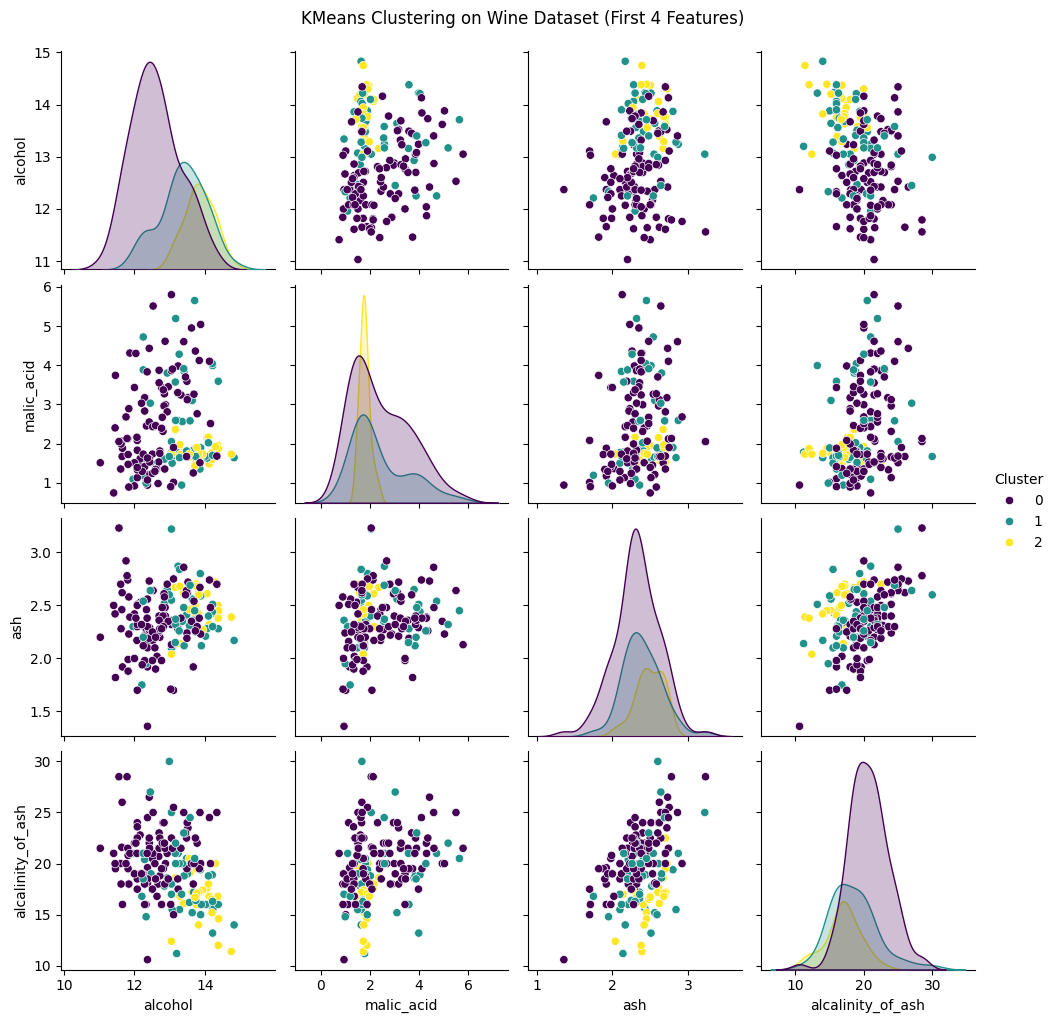

In [12]:
### 26. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine


wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(wine.data)
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()

In [14]:
### 27. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
X += 5 * np.random.rand(*X.shape)
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Clusters and noise point count:", dict(zip(unique, counts)))

Clusters and noise point count: {np.int64(-1): np.int64(2), np.int64(0): np.int64(100), np.int64(1): np.int64(99), np.int64(2): np.int64(99)}


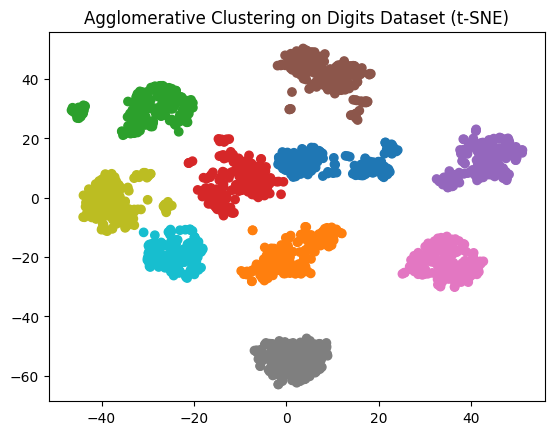

In [18]:
### 28. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

from sklearn.manifold import TSNE

from sklearn.datasets import load_digits
digits = load_digits()


X = digits.data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE)")
plt.show()

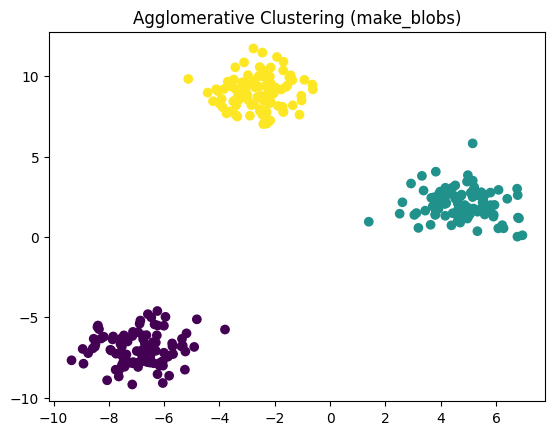

In [24]:
### 29. Generate synthetic data using `make_blobs` and visualize the clusters with `Agglomerative Clustering` and decision boundaries

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# Plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (make_blobs)")
plt.show()

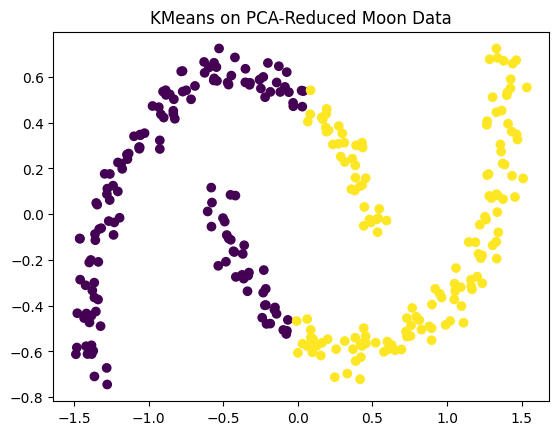

In [26]:
### 30. Generate synthetic data using `make_moons`, reduce dimensions with PCA, apply KMeans, and visualize

from sklearn.datasets import make_moons
from sklearn.decomposition import PCA

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_pca = PCA(n_components=2).fit_transform(X)
labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("KMeans on PCA-Reduced Moon Data")
plt.show()


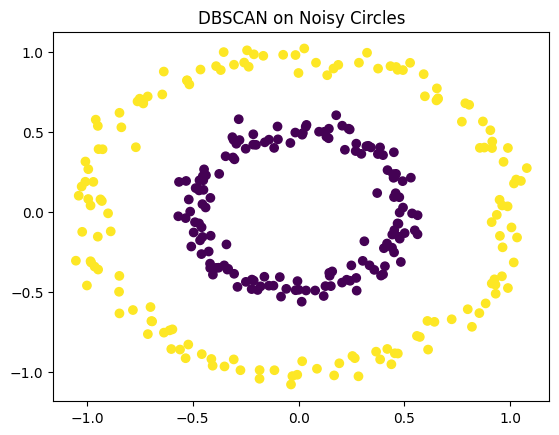

In [28]:
### 31. Generate concentric circles with noise using `make_circles`, apply DBSCAN, and visualize

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN on Noisy Circles")
plt.show()


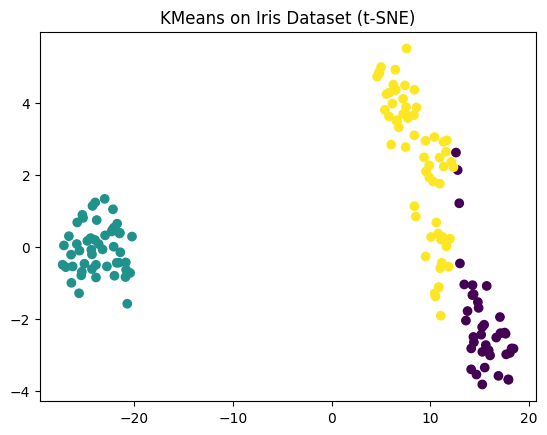

In [29]:
### 32. Load the Iris dataset and use t-SNE for visualization after applying KMeans

from sklearn.manifold import TSNE

X = iris.data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title("KMeans on Iris Dataset (t-SNE)")
plt.show()

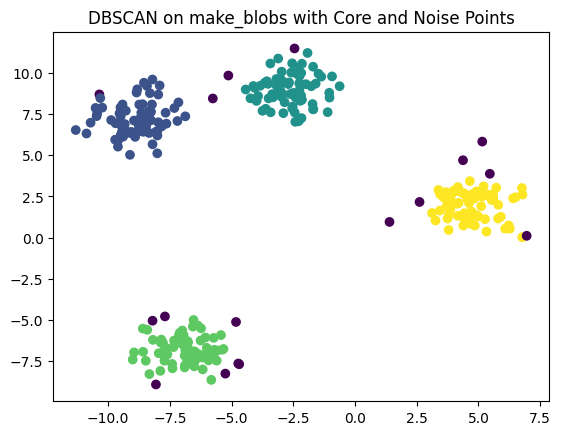

In [30]:
### 33. Generate synthetic data using make_blobs and apply DBSCAN, then visualize and evaluate noise vs core points

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN on make_blobs with Core and Noise Points")
plt.show()

In [31]:
### 34. Load the Wine dataset, reduce dimensions with PCA, apply DBSCAN, and count clusters

X = StandardScaler().fit_transform(load_wine().data)
X_pca = PCA(n_components=2).fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 5


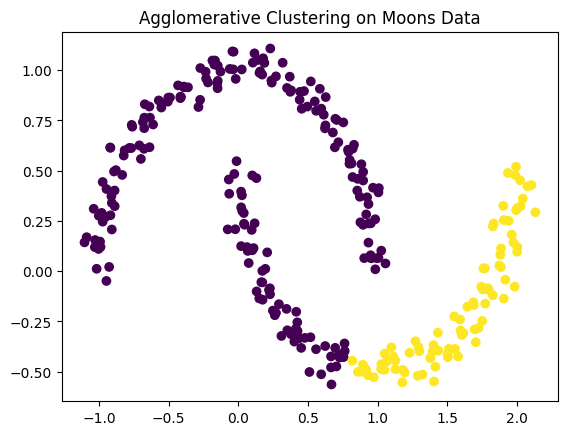

In [32]:
### 35. Generate synthetic interleaving half circles (make_moons), apply Agglomerative Clustering, and visualize

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on Moons Data")
plt.show()

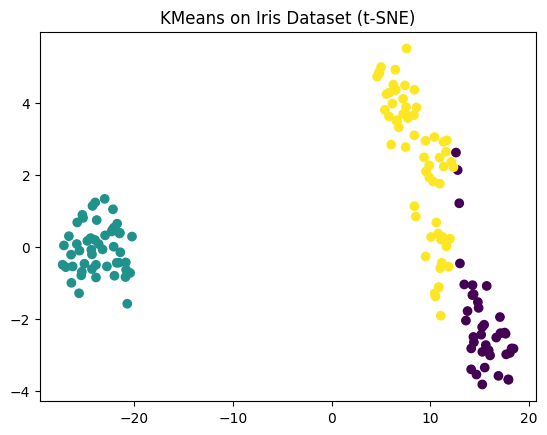

In [33]:
from sklearn.manifold import TSNE

X = iris.data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title("KMeans on Iris Dataset (t-SNE)")
plt.show()


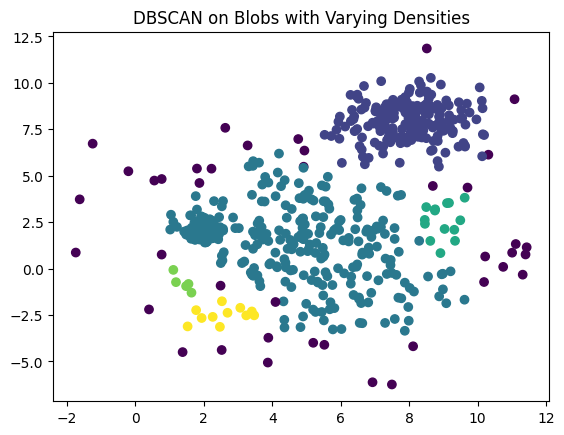

In [34]:
### 36. Generate synthetic data using make_blobs with varying densities, then use DBSCAN to detect clusters and noise


X, _ = make_blobs(n_samples=[100, 200, 300], centers=[[2, 2], [8, 8], [5, 1]], cluster_std=[0.3, 1.0, 2.5], random_state=42)
db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN on Blobs with Varying Densities")
plt.show()

In [35]:
num_noise = list(labels).count(-1)
print("Number of noise points:", num_noise)


Number of noise points: 40


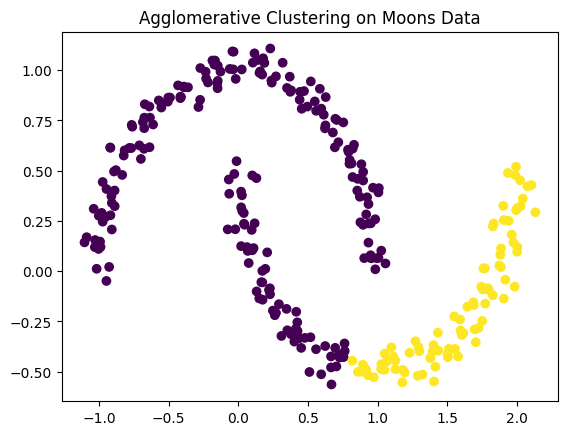

In [37]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='average')
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on Moons Data")
plt.show()

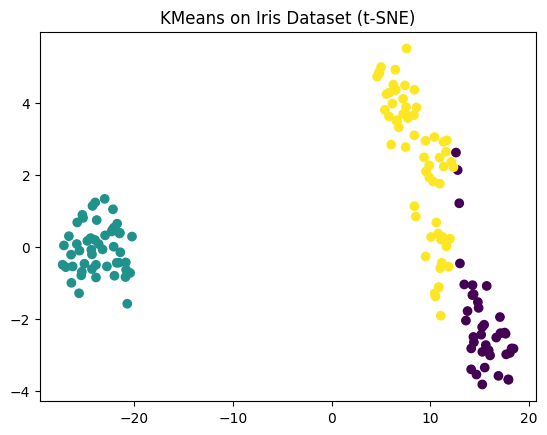

In [39]:
from sklearn.manifold import TSNE

X = iris.data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title("KMeans on Iris Dataset (t-SNE)")
plt.show()


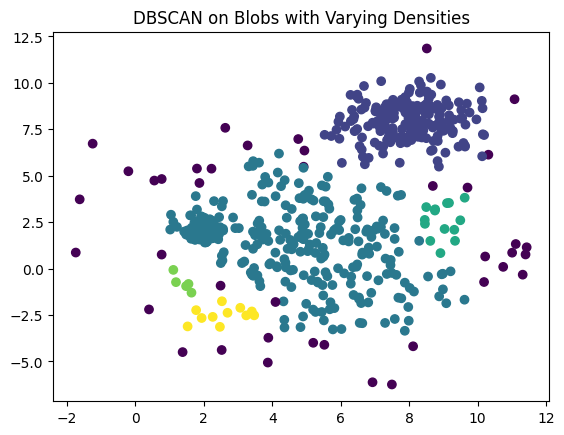

In [40]:
### 36. Generate synthetic data using make_blobs with varying densities, then use DBSCAN to detect clusters and noise

X, _ = make_blobs(n_samples=[100, 200, 300], centers=[[2, 2], [8, 8], [5, 1]], cluster_std=[0.3, 1.0, 2.5], random_state=42)
db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN on Blobs with Varying Densities")
plt.show()


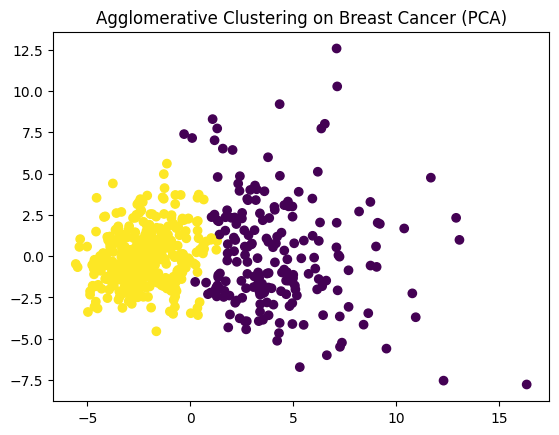

In [41]:
### 37. Load the Breast Cancer dataset, apply PCA, and use Agglomerative Clustering to group into 2 clusters. Visualize

cancer = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(cancer.data)
X_pca = PCA(n_components=2).fit_transform(X_scaled)
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on Breast Cancer (PCA)")
plt.show()


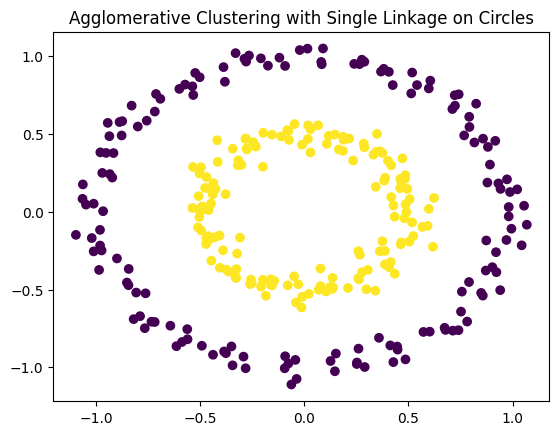

In [43]:
### 38. Generate synthetic data with concentric circles and apply Agglomerative Clustering with single linkage

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
labels = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering with Single Linkage on Circles")
plt.show()

In [44]:
### 39. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

wine = load_wine()
X_scaled = StandardScaler().fit_transform(wine.data)
labels = DBSCAN(eps=1.5, min_samples=5).fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


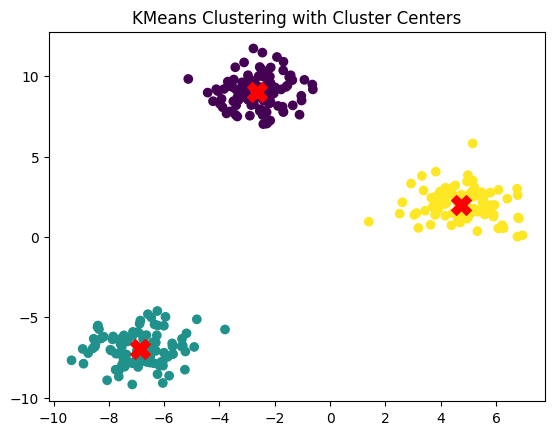

In [46]:
### 40. Generate synthetic data using make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("KMeans Clustering with Cluster Centers")
plt.show()

In [47]:
### 41. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)
labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_scaled)
noise_count = list(labels).count(-1)
print("Number of noise samples:", noise_count)

Number of noise samples: 34


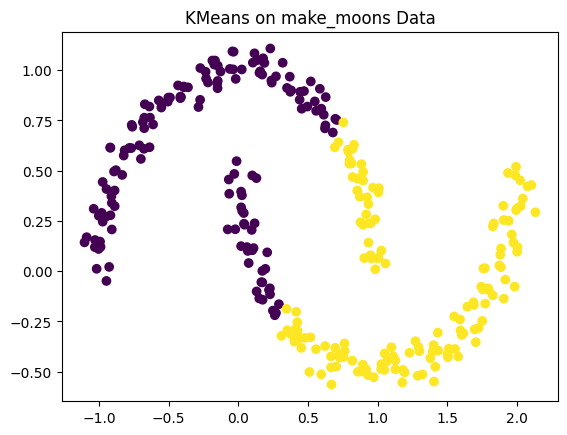

In [48]:
### 42. Generate synthetic non-linearly separable data using make_moons, apply KMeans, and visualize the clustering result

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("KMeans on make_moons Data")
plt.show()

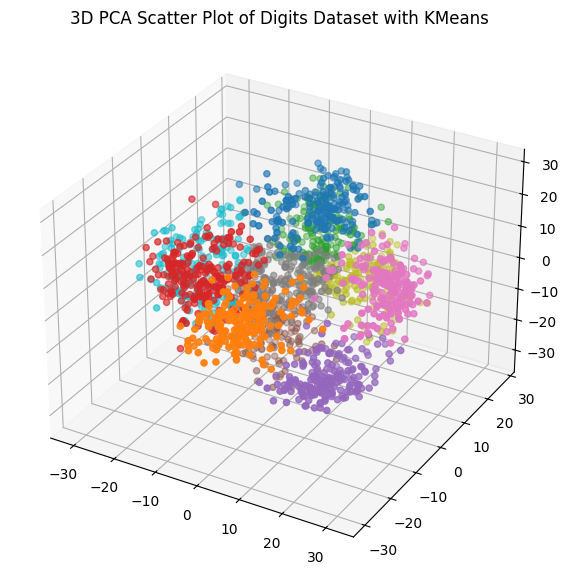

In [49]:
### 43. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X_pca = PCA(n_components=3).fit_transform(digits.data)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')
ax.set_title("3D PCA Scatter Plot of Digits Dataset with KMeans")
plt.show()

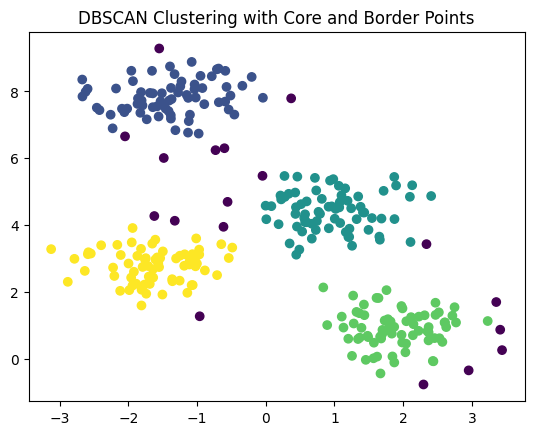

In [50]:
### 44. Generate synthetic data using make_blobs and apply DBSCAN. Visualize both core and border points

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering with Core and Border Points")
plt.show()

In [51]:
### 45. Load the Breast Cancer dataset, apply KMeans, and print the number of samples in each cluster

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

cancer = load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sample counts:", dict(zip(unique, counts)))

Cluster sample counts: {np.int32(0): np.int64(188), np.int32(1): np.int64(381)}


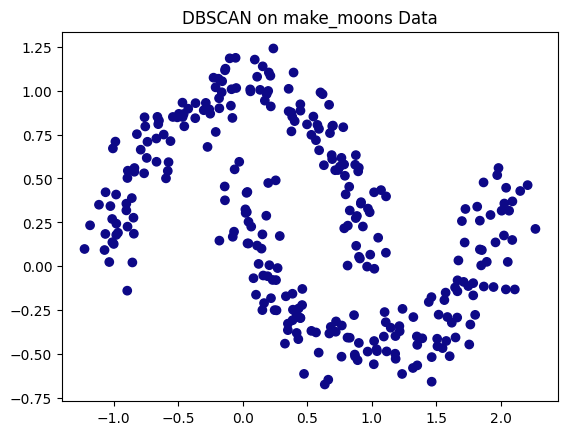

In [54]:
### 46. Generate synthetic data using make_moons, apply DBSCAN and visualize the clusters and outliers

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN on make_moons Data")
plt.show()

In [55]:
### 47. Use the Digits dataset, reduce dimensions with PCA, apply DBSCAN, and count the number of clusters

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_pca)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 1


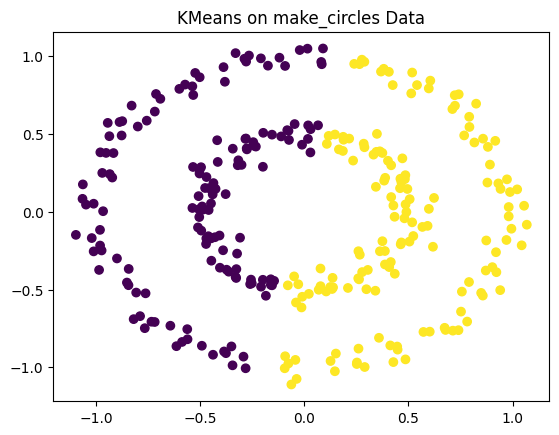

In [56]:
### 48. Generate synthetic data using make_circles and apply KMeans. Visualize clustering results


from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("KMeans on make_circles Data")
plt.show()